# 傅里叶变换-展示频域和图像处理

## 地震波的模拟和其傅里叶变换

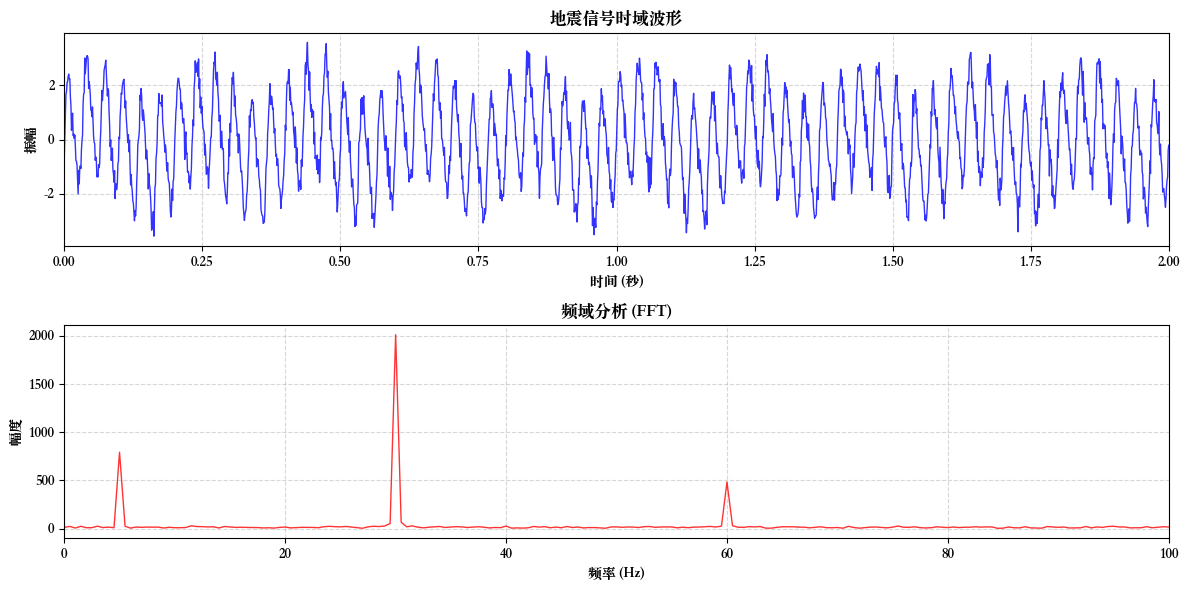

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
fs = 1000          # 采样率 (Hz)
duration = 2.0     # 信号时长 (秒)
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples)  # 时间轴

# 生成地震信号（正弦波叠加噪声）
def generate_seismic_signal(t):
    # 主频成分
    main_freq = 30  # 主频30Hz
    signal = 2.0 * np.sin(2 * np.pi * main_freq * t)  # 主信号

    # 添加谐波和干扰
    harmonic = 0.5 * np.sin(2 * np.pi * 60 * t)      # 60Hz谐波
    noise_low = 0.8 * np.sin(2 * np.pi * 5 * t)      # 5Hz低频干扰
    noise_rand = 0.3 * np.random.normal(0, 1, n_samples)  # 随机噪声

    return signal + harmonic + noise_low + noise_rand

signal = generate_seismic_signal(t)

# 傅里叶变换
fft_result = np.fft.fft(signal)            # 快速傅里叶变换
freq = np.fft.fftfreq(n_samples, 1/fs)     # 频率轴
magnitude = np.abs(fft_result)             # 幅度谱

# 动态设置中文字体（macOS）
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 或 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建画布
plt.figure(figsize=(12, 6))

# 时域子图
plt.subplot(2, 1, 1)
plt.plot(t, signal, 'b', linewidth=1, alpha=0.8)
plt.title('地震信号时域波形', fontsize=12)
plt.xlabel('时间 (秒)', fontsize=10)
plt.ylabel('振幅', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, duration)

# 频域子图
plt.subplot(2, 1, 2)
positive_freq = freq[:n_samples//2]       # 取正频率部分
positive_mag = magnitude[:n_samples//2]
plt.plot(positive_freq, positive_mag, 'r', linewidth=1, alpha=0.8)
plt.title('频域分析 (FFT)', fontsize=12)
plt.xlabel('频率 (Hz)', fontsize=10)
plt.ylabel('幅度', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 100)  # 显示0-100Hz范围

plt.tight_layout()
plt.savefig('seismic_analysis.png', dpi=300)
plt.show()

## 地震波和核爆信号的模拟，以及傅里叶变换，分开展示

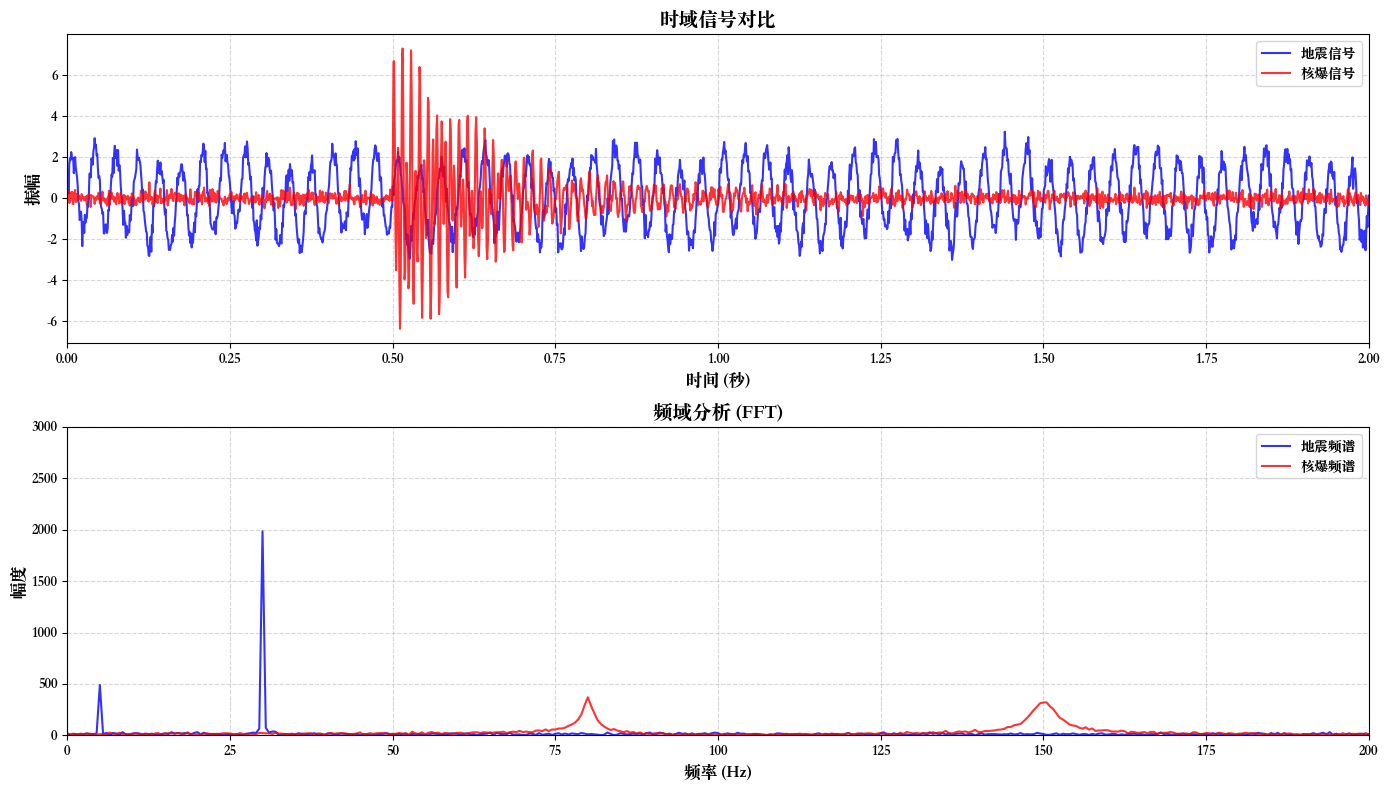

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
fs = 1000          # 采样率 (Hz)
duration = 2.0     # 信号时长 (秒)
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples)

# 生成地震信号
def generate_earthquake(t):
    main_freq = 30  # 主频30Hz
    signal = 2.0 * np.sin(2 * np.pi * main_freq * t)
    # 低频干扰和噪声
    noise_low = 0.5 * np.sin(2 * np.pi * 5 * t)
    noise_rand = 0.3 * np.random.normal(0, 1, n_samples)
    return signal + noise_low + noise_rand

# 生成核爆信号
def generate_nuclear(t):
    # 主频80Hz + 瞬时高频脉冲（150Hz）
    main_signal = 3.0 * np.sin(2 * np.pi * 80 * t)
    # 高频脉冲（0.1秒处）
    pulse_time = 0.5  # 脉冲发生时间
    pulse = 5.0 * np.exp(-20*(t - pulse_time)**2) * np.sin(2 * np.pi * 150 * t)
    # 指数衰减包络
    envelope = np.exp(-4*(t - pulse_time)) * (t >= pulse_time)
    return (main_signal + pulse) * envelope + 0.2 * np.random.normal(0, 1, n_samples)
# 生成信号
earthquake = generate_earthquake(t)
nuclear = generate_nuclear(t)

# 傅里叶变换
def compute_fft(signal):
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(n_samples, 1/fs)
    magnitude = np.abs(fft_result)
    return freq, magnitude

freq_eq, mag_eq = compute_fft(earthquake)
freq_nu, mag_nu = compute_fft(nuclear)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['axes.unicode_minus'] = False

# 绘制时域和频域对比
plt.figure(figsize=(14, 8))

# 时域对比
plt.subplot(2, 1, 1)
plt.plot(t, earthquake, 'b', label='地震信号', alpha=0.8)
plt.plot(t, nuclear, 'r', label='核爆信号', alpha=0.8)
plt.title('时域信号对比', fontsize=14)
plt.xlabel('时间 (秒)', fontsize=12)
plt.ylabel('振幅', fontsize=12)
plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.xlim(0, duration)

# 频域对比
plt.subplot(2, 1, 2)
plt.plot(freq_eq[:n_samples//2], mag_eq[:n_samples//2], 'b', label='地震频谱', alpha=0.8)
plt.plot(freq_nu[:n_samples//2], mag_nu[:n_samples//2], 'r', label='核爆频谱', alpha=0.8)
plt.title('频域分析 (FFT)', fontsize=14)
plt.xlabel('频率 (Hz)', fontsize=12)
plt.ylabel('幅度', fontsize=12)
plt.grid(ls='--', alpha=0.5)
plt.xlim(0, 200)  # 显示0-200Hz
plt.ylim(0, 3000)  # 调整幅度范围
plt.legend()

plt.tight_layout()
plt.savefig('signal_comparison.png', dpi=300)
plt.show()

## 地震信号和核爆信号，混合在一起

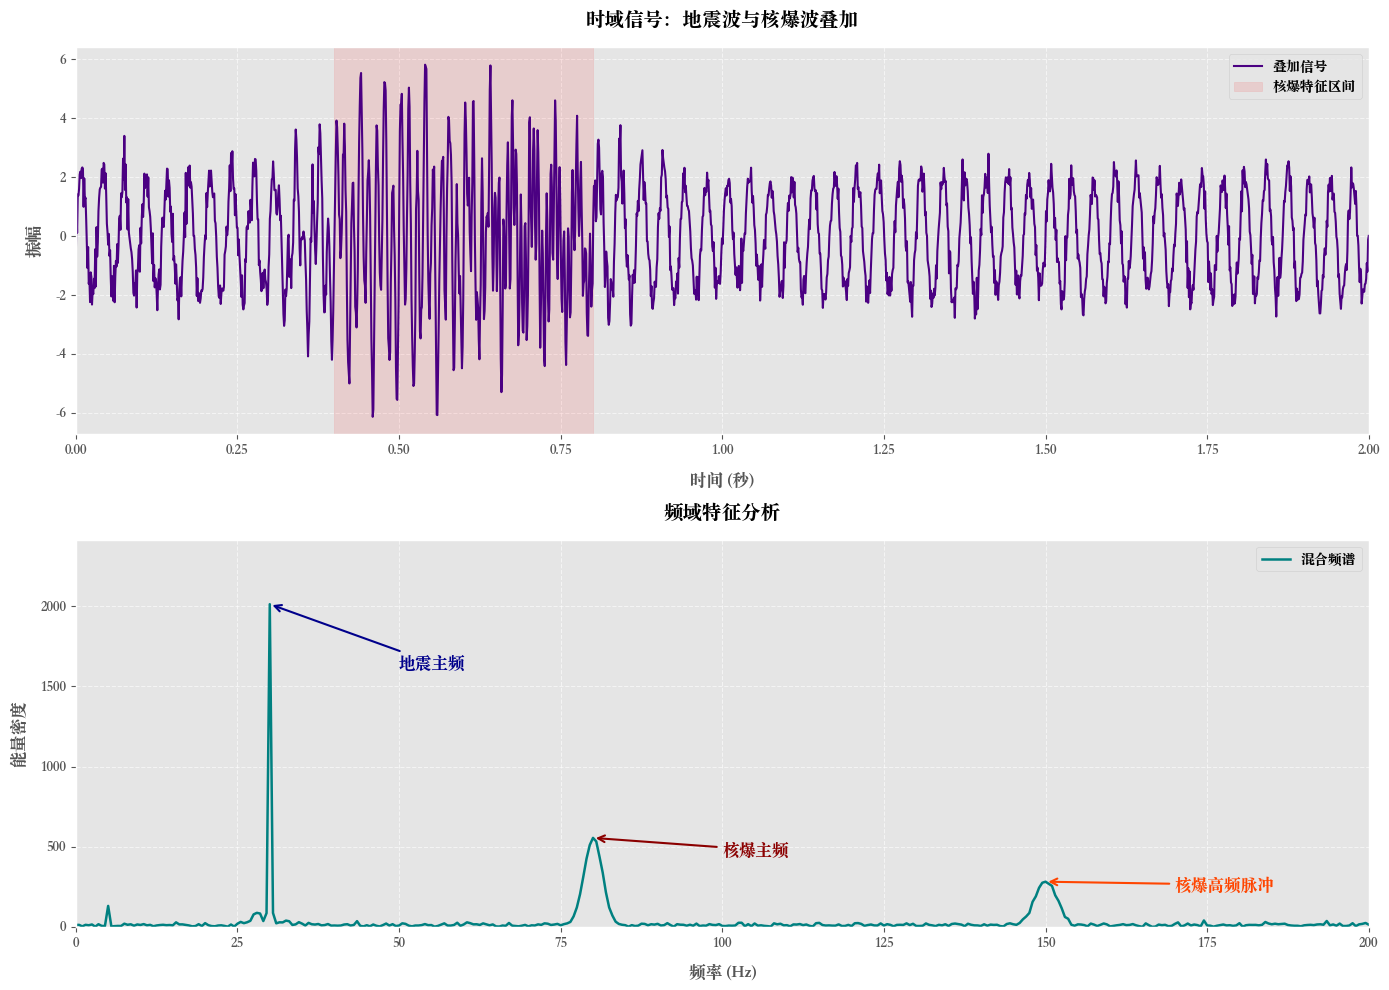

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
fs = 1000
duration = 2.0
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples)

# 生成地震信号
def generate_earthquake(t):
    main_freq = 30
    signal = 2.0 * np.sin(2 * np.pi * main_freq * t)
    reflection = 0.6 * np.sin(2 * np.pi * 28 * (t - 0.8)) * np.exp(-3*(t - 0.8)) * (t >= 0.8)
    noise = 0.3 * (np.random.normal(0, 1, len(t)) + 0.5 * np.sin(2 * np.pi * 5 * t))
    return signal + reflection + noise

# 生成核爆信号
def generate_nuclear(t):
    main_pulse = 4.0 * np.exp(-40*(t - 0.5)**2) * np.sin(2 * np.pi * 80 * t)
    high_freq_pulse = 2.5 * np.exp(-60*(t - 0.7)**2) * np.sin(2 * np.pi * 150 * t)
    radiation_noise = 0.4 * np.random.normal(0, 1, len(t)) * np.exp(-2*t)
    return main_pulse + high_freq_pulse + radiation_noise

# 生成叠加信号
combined_signal = generate_earthquake(t) + generate_nuclear(t)

# 傅里叶变换
fft_result = np.fft.fft(combined_signal)
freq = np.fft.fftfreq(n_samples, 1/fs)
magnitude = np.abs(fft_result)

# 设置中文和样式（使用内置样式）
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Songti SC',
    'axes.unicode_minus': False
})
plt.style.use('ggplot')  # 改用内置样式，如 'seaborn'、'classic' 等

# 绘图代码（保持原样）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})
# 时域图
ax1.plot(t, combined_signal, color='#4B0082', linewidth=1.5, label='叠加信号')
ax1.axvspan(0.4, 0.8, color='red', alpha=0.1, label='核爆特征区间')
ax1.set_title('时域信号：地震波与核爆波叠加', fontsize=14, pad=15)
ax1.set_xlabel('时间 (秒)', fontsize=12, labelpad=10)
ax1.set_ylabel('振幅', fontsize=12, labelpad=10)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(0, duration)
ax1.legend(loc='upper right')

# 频域图
ax2.plot(freq[:n_samples//2], magnitude[:n_samples//2], color='#008080', linewidth=1.8, label='混合频谱')
annotations = [
    (30, '地震主频', '#00008B'),
    (80, '核爆主频', '#8B0000'),
    (150, '核爆高频脉冲', '#FF4500')
]
for freq_val, text, color in annotations:
    idx = np.argmin(np.abs(freq[:n_samples//2] - freq_val))
    ax2.annotate(text,
                xy=(freq_val, magnitude[idx]),
                xytext=(freq_val+20, magnitude[idx]*0.8),
                arrowprops=dict(arrowstyle="->", color=color, linewidth=1.5),
                fontsize=12, color=color)
ax2.set_title('频域特征分析', fontsize=14, pad=15)
ax2.set_xlabel('频率 (Hz)', fontsize=12, labelpad=10)
ax2.set_ylabel('能量密度', fontsize=12, labelpad=10)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim(0, 200)
ax2.set_ylim(0, 1.2*np.max(magnitude[:n_samples//2]))
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('combined_signal_analysis_pro.png', dpi=300, bbox_inches='tight')
plt.show()

## 小波变换

In [ ]:
缺少包pywt，运行不起来

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pywt

# 参数设置
fs = 1000
duration = 2.0
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples)

# 生成地震信号
def generate_earthquake(t):
    main_freq = 30
    signal = 2.0 * np.sin(2 * np.pi * main_freq * t)
    reflection = 0.6 * np.sin(2 * np.pi * 28 * (t - 0.8)) * np.exp(-3*(t - 0.8)) * (t >= 0.8)
    noise = 0.3 * (np.random.normal(0, 1, len(t)) + 0.5 * np.sin(2 * np.pi * 5 * t))
    return signal + reflection + noise

# 生成核爆信号
def generate_nuclear(t):
    main_pulse = 4.0 * np.exp(-40*(t - 0.5)**2) * np.sin(2 * np.pi * 80 * t)
    high_freq_pulse = 2.5 * np.exp(-60*(t - 0.7)**2) * np.sin(2 * np.pi * 150 * t)
    radiation_noise = 0.4 * np.random.normal(0, 1, len(t)) * np.exp(-2*t)
    return main_pulse + high_freq_pulse + radiation_noise

# 生成叠加信号
combined_signal = generate_earthquake(t) + generate_nuclear(t)

# 小波变换参数
wavelet_name = 'morl'
scales = np.arange(1, 200)
sampling_period = 1/fs

# 执行连续小波变换
coefficients, frequencies = pywt.cwt(combined_signal, scales, wavelet_name, sampling_period=sampling_period)

# 转换为能量密度（已修复行）
power = (np.abs(coefficients)) * 2


# 设置中文
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['axes.unicode_minus'] = False

# 创建3D画布
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成网格数据
X, Y = np.meshgrid(t, frequencies)
surf = ax.plot_surface(X, Y, power, cmap='jet', rstride=5, cstride=5, alpha=0.8)

# 设置坐标轴
ax.set_xlabel('时间 (秒)', fontsize=12, labelpad=15)
ax.set_ylabel('频率 (Hz)', fontsize=12, labelpad=15)
ax.set_zlabel('能量密度', fontsize=12, labelpad=15)
ax.set_title('时频能量分布 (Morlet小波变换)', fontsize=14, pad=20)

# 调整视角
ax.view_init(elev=45, azim=-45)

# 颜色条
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.set_label('能量强度', fontsize=12)

plt.tight_layout()
plt.savefig('wavelet_3d.png', dpi=300, bbox_inches='tight')
plt.show()

ModuleNotFoundError: No module named 'pywt'

## (时域)图像的低通滤波-- 盒式滤波

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

def manual_box_filter(image, kernel_size=3):
    """
    手动实现盒式滤波（均值滤波）
    :param image: 输入灰度图像矩阵 (H, W)
    :param kernel_size: 滤波器尺寸（奇数）
    :return: 滤波后图像 (uint8)
    """
    # 参数校验
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd number")
    if len(image.shape) != 2:
        raise ValueError("Input image must be grayscale")

    # 初始化参数
    pad = kernel_size // 2
    h, w = image.shape
    filtered = np.zeros((h, w), dtype=np.float32)

    # 边界反射填充
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    # 手动卷积操作
    for i in range(h):
        for j in range(w):
            # 获取当前像素的邻域
            region = padded[i:i+kernel_size, j:j+kernel_size]
            # 计算均值
            filtered[i, j] = np.mean(region)

    # 转换回uint8类型
    return np.clip(filtered, 0, 255).astype(np.uint8)
# 主程序
if __name__ == "__main__":
    # 读取图像
    img_path = "lena.png"
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise FileNotFoundError
    except Exception as e:
        print(f"Error loading image: {e}")
        exit()

    # 设置滤波器参数
    KERNEL_SIZE = 7  # 可修改为3,5,9等奇数

    # 手动滤波
    start_time = time.time()
    manual_blurred = manual_box_filter(img, KERNEL_SIZE)
    manual_time = time.time() - start_time

    # OpenCV内置函数
    start_time = time.time()
    opencv_blurred = cv2.blur(img, (KERNEL_SIZE, KERNEL_SIZE))
    opencv_time = time.time() - start_time

    # 结果对比
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original Image\nSize: {img.shape}')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(manual_blurred, cmap='gray')
    plt.title(f'Manual Filter\nSize={KERNEL_SIZE}x{KERNEL_SIZE}\nTime: {manual_time:.4f}s')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(opencv_blurred, cmap='gray')
    plt.title(f'OpenCV Filter\nTime: {opencv_time:.4f}s')
    plt.axis('off')
    plt.tight_layout()

    # 保存结果
    #cv2.imwrite('lena_manual_blur.png', manual_blurred)
    #cv2.imwrite('lena_opencv_blur.png', opencv_blurred)
    plt.show()

## （时域）图像的高通滤波-- 盒式滤波

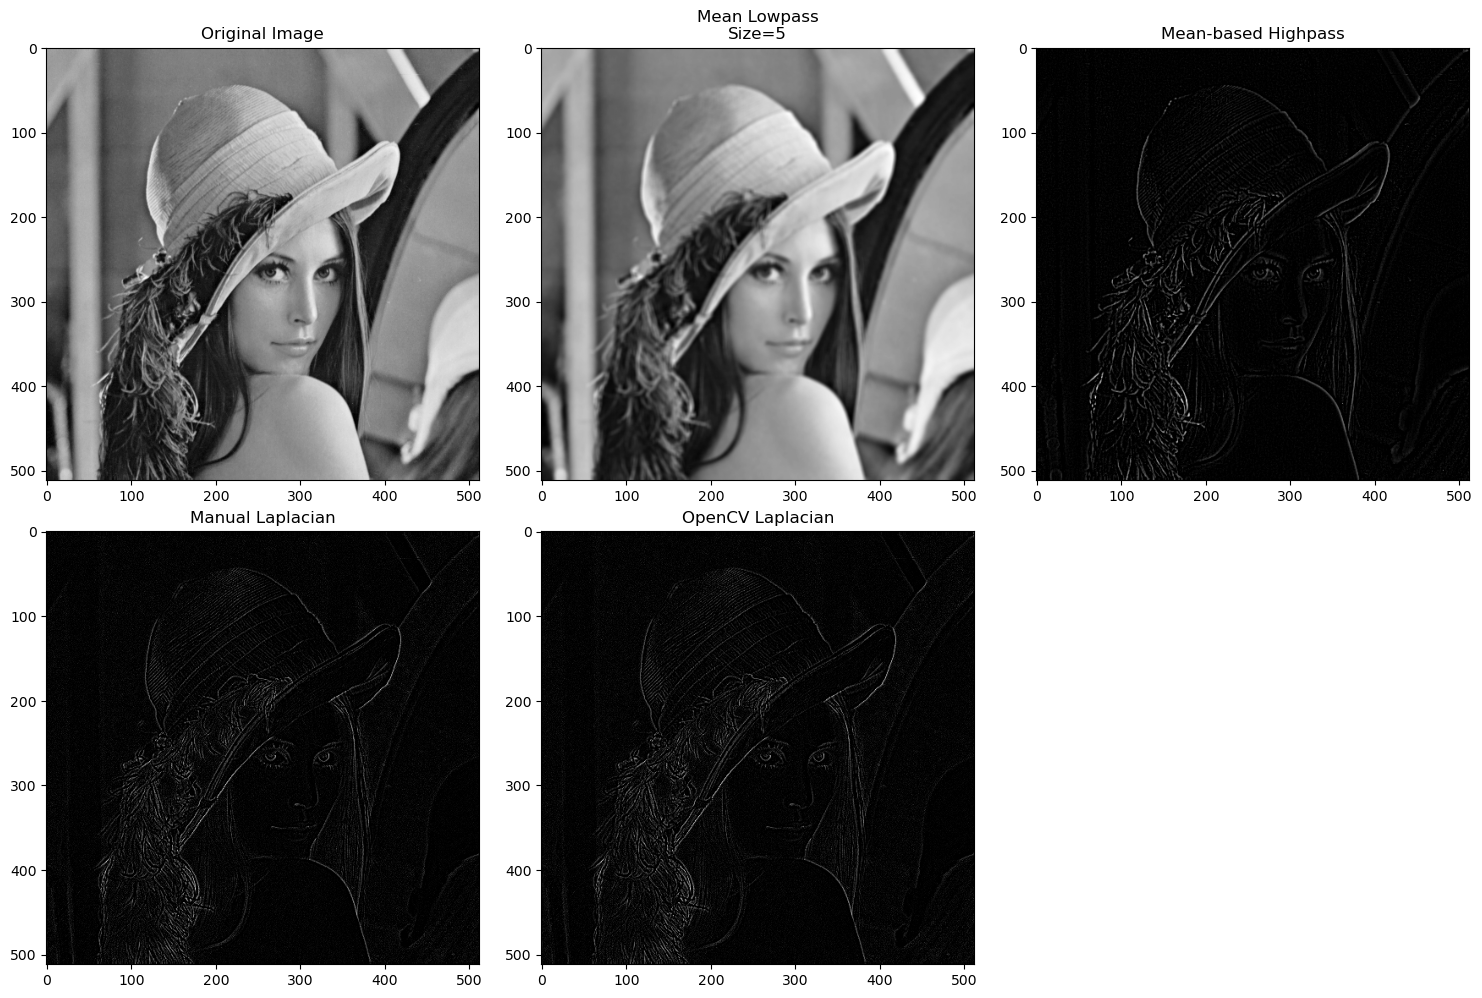

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== 均值滤波模块 ==========
def generate_mean_kernel(size):
    """生成均值滤波核[5,7](@ref)
    :param size: 奇数尺寸 (e.g. 3,5,7)
    :return: 均值核矩阵
    """
    return np.ones((size, size)) / (size**2)

def manual_mean_blur(image, kernel_size=5):
    """手动均值滤波实现[5,8](@ref)
    :param image: 输入灰度图像
    :return: 滤波后图像
    """
    kernel = generate_mean_kernel(kernel_size)
    pad = kernel_size // 2
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    filtered = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kernel_size, j:j+kernel_size]
            filtered[i,j] = np.sum(region * kernel)

    return filtered.astype(np.uint8)

def opencv_mean_blur(image, kernel_size=5):
    """OpenCV均值滤波优化实现[7,12](@ref)
    """
    return cv2.blur(image, (kernel_size, kernel_size))
# ========== 高通滤波模块 ==========
def generate_highpass_kernel(mode='laplacian'):
    """生成高通滤波核[9,11](@ref)
    :param mode: 核类型 ['laplacian', 'sobel']
    """
    if mode == 'laplacian':
        return np.array([[0, 1, 0],
                         [1, -4, 1],
                         [0, 1, 0]], dtype=np.float32)
    elif mode == 'sobel':
        return np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]], dtype=np.float32)

def manual_highpass(image, kernel_size=3):
    """手动高通滤波[9,11](@ref)
    """
    kernel = generate_highpass_kernel()
    pad = kernel_size // 2
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    filtered = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kernel_size, j:j+kernel_size]
            filtered[i,j] = np.clip(np.sum(region * kernel), 0, 255)

    return filtered.astype(np.uint8)

def mean_based_highpass(image, kernel_size=5):
    """基于均值滤波的高通实现[6,13](@ref)
    (高通 = 原图 - 均值滤波结果)
    """
    lowpass = manual_mean_blur(image, kernel_size)
    return cv2.subtract(image, lowpass)
# ========== 主程序 ==========
if __name__ == "__main__":
    # 读取图像
    img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

    # 参数设置
    KERNEL_SIZE = 5
    SIGMA = 1.5  # 仅用于OpenCV高斯滤波

    # 执行滤波
    mean_lowpass = manual_mean_blur(img, KERNEL_SIZE)
    mean_highpass = mean_based_highpass(img, KERNEL_SIZE)
    opencv_highpass = cv2.Laplacian(img, cv2.CV_8U)

    # 可视化对比
    plt.figure(figsize=(15,10))

    plt.subplot(2,3,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2,3,2)
    plt.imshow(mean_lowpass, cmap='gray')
    plt.title(f'Mean Lowpass\nSize={KERNEL_SIZE}')

    plt.subplot(2,3,3)
    plt.imshow(mean_highpass, cmap='gray')
    plt.title('Mean-based Highpass')

    plt.subplot(2,3,4)
    plt.imshow(manual_highpass(img), cmap='gray')
    plt.title('Manual Laplacian')

    plt.subplot(2,3,5)
    plt.imshow(opencv_highpass, cmap='gray')
    plt.title('OpenCV Laplacian')

    plt.tight_layout()
    plt.show()

## (时域)sinc 函数的低通滤波

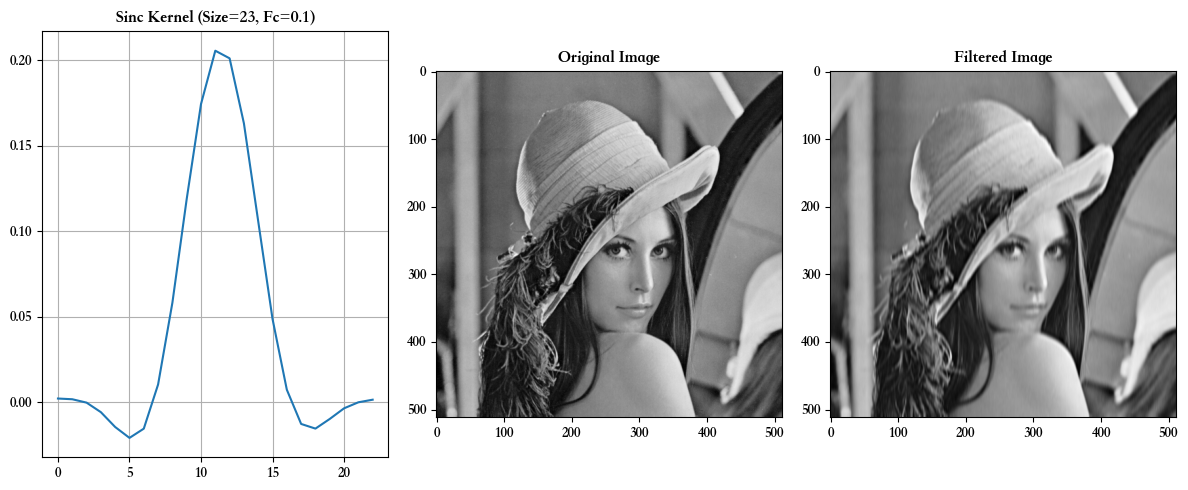

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_sinc_kernel(cutoff_freq=0.1, kernel_size=15):
    """
    生成截断并加窗的sinc低通滤波器核
    :param cutoff_freq: 截止频率 (0~0.5, 对应Nyquist频率)
    :param kernel_size: 滤波器尺寸（自动调整为奇数）
    :return: 归一化的滤波器核
    """
    # 强制核尺寸为奇数
    kernel_size = kernel_size if kernel_size % 2 else kernel_size + 1

    # 生成时间轴（中心对称，包含kernel_size个点）
    t = np.linspace(-kernel_size//2, kernel_size//2, kernel_size)
    t = np.where(t == 0, 1e-6, t)  # 避免除以0

    # 计算sinc函数
    sinc = np.sin(2 * np.pi * cutoff_freq * t) / (np.pi * t)

    # 加汉明窗减少振铃效应
    window = np.hamming(kernel_size)
    kernel = sinc * window

    # 归一化
    return kernel / np.sum(kernel)
def sinc_lowpass_filter(image, cutoff_freq=0.1, kernel_size=15):
    """
    sinc低通滤波
    :param image: 输入灰度图像
    :return: 滤波后图像
    """
    # 生成滤波器核（自动调整尺寸为奇数）
    kernel = generate_sinc_kernel(cutoff_freq, kernel_size)

    # 转换为二维可分离核
    kernel_2d = np.outer(kernel, kernel)

    # 边界反射填充
    pad = len(kernel) // 2
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    # 卷积运算（可分离优化）
    row_filtered = cv2.filter2D(padded, -1, kernel)
    filtered = cv2.filter2D(row_filtered, -1, kernel.reshape(-1,1))

    # 裁剪有效区域
    return np.clip(filtered[pad:-pad, pad:-pad], 0, 255).astype(np.uint8)

# ========== 主程序 ==========
if __name__ == "__main__":
    # 读取图像
    img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

    # 参数设置
    CUTOFF_FREQ = 0.1   # 截止频率 (0.05~0.4)
    KERNEL_SIZE = 22     # 输入任意尺寸（代码自动调整为23）

    # 执行滤波
    filtered = sinc_lowpass_filter(img, CUTOFF_FREQ, KERNEL_SIZE)

    # 可视化
    plt.figure(figsize=(12,5))

    # 绘制滤波器核
    kernel = generate_sinc_kernel(CUTOFF_FREQ, KERNEL_SIZE)
    plt.subplot(131)
    plt.plot(kernel)
    plt.title(f'Sinc Kernel (Size={len(kernel)}, Fc={CUTOFF_FREQ})')
    plt.grid(True)

    # 原始图像
    plt.subplot(132)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    # 滤波结果
    plt.subplot(133)
    plt.imshow(filtered, cmap='gray')
    plt.title('Filtered Image')

    plt.tight_layout()
    plt.show()

## (时域)高斯函数的低通滤波

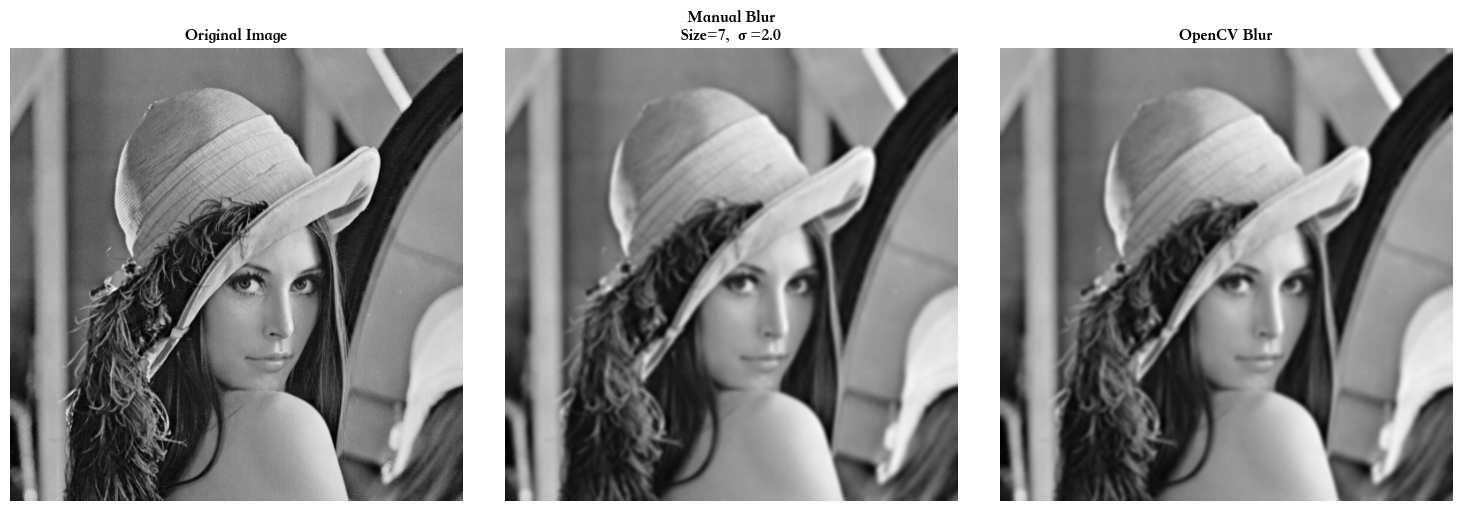

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== 核心函数 ==========
def generate_gaussian_kernel(size, sigma=1.0):
    """生成二维高斯核[5,6](@ref)
    :param size: 奇数尺寸 (e.g. 5,7,9)
    :param sigma: 标准差，控制模糊程度
    :return: 归一化高斯核
    """
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2

    # 二维高斯函数离散化采样[9](@ref)
    for x in range(size):
        for y in range(size):
            dx = x - center
            dy = y - center
            kernel[x, y] = np.exp(-(dx**2 + dy**2)/(2*sigma**2))

    return kernel / np.sum(kernel)  # 归一化保证亮度不变[6](@ref)

def manual_gaussian_blur(image, kernel_size=5, sigma=1.0):
    """手动卷积实现高斯滤波[9](@ref)
    :param image: 输入灰度图像
    :return: 滤波后图像
    """
    kernel = generate_gaussian_kernel(kernel_size, sigma)
    pad = kernel_size // 2

    # 边界反射填充[6](@ref)
    padded_img = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    # 卷积计算
    filtered = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered[i,j] = np.sum(region * kernel)

    return filtered.astype(np.uint8)
def opencv_gaussian_blur(image, kernel_size=5, sigma=1.0):
    """OpenCV优化实现[5,10](@ref)
    :param kernel_size: 必须为奇数
    :param sigma: 若设为0则自动计算σ=0.3*((ksize-1)*0.5-1)+0.8
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX=sigma)

# ========== 主程序 ==========
if __name__ == "__main__":
    # 读取图像并转换为灰度
    img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

    # 参数设置
    kernel_size = 7    # 滤波器尺寸（建议3-15的奇数）
    sigma = 2.0        # 标准差（推荐0.5-5.0）

    # 执行滤波
    manual_result = manual_gaussian_blur(img, kernel_size, sigma)
    opencv_result = opencv_gaussian_blur(img, kernel_size, sigma)

    # 可视化对比
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(manual_result, cmap='gray')
    plt.title(f'Manual Blur\nSize={kernel_size}, σ={sigma}')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(opencv_result, cmap='gray')
    plt.title('OpenCV Blur')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## (时域)高斯函数的高通滤波

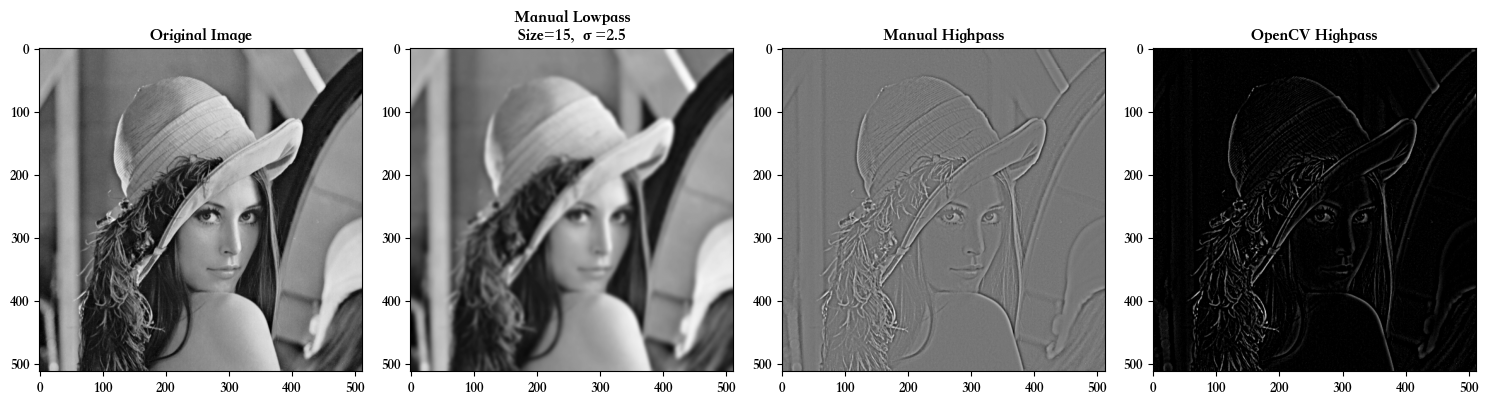

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_kernel(size, sigma=1.0):
    """生成二维高斯核
    :param size: 核尺寸（奇数）
    :param sigma: 标准差，控制模糊程度
    :return: 归一化高斯核
    """
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    for x in range(size):
        for y in range(size):
            dx = x - center
            dy = y - center
            kernel[x, y] = np.exp(-(dx**2 + dy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

def manual_gaussian_highpass(image, kernel_size=5, sigma=1.0):
    """手动高斯高通滤波
    :return: 高通滤波后的图像
    """
    # 生成高斯低通核
    lowpass_kernel = generate_gaussian_kernel(kernel_size, sigma)

    # 执行低通滤波
    lowpass = cv2.filter2D(image, -1, lowpass_kernel, borderType=cv2.BORDER_REFLECT)

    # 计算高通图像
    highpass = image.astype(np.float32) - lowpass.astype(np.float32)
    highpass = np.clip(highpass + 128, 0, 255)  # 提升亮度便于显示
    return lowpass.astype(np.uint8), highpass.astype(np.uint8)

def opencv_gaussian_highpass(image, sigma=1.0):
    """OpenCV优化实现
    :param sigma: 高斯核标准差
    :return: 高通图像
    """
    lowpass = cv2.GaussianBlur(image, (0,0), sigmaX=sigma)
    highpass = cv2.subtract(image, lowpass)
    return lowpass, highpass + 128

# ========== 主程序 ==========
if __name__ == "__main__":
    # 读取图像并转换为灰度
    img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

    # 参数设置
    KERNEL_SIZE = 15    # 高斯核尺寸（奇数）
    SIGMA = 2.5         # 标准差（控制模糊程度）

    # 执行滤波
    manual_lowpass, manual_highpass = manual_gaussian_highpass(img, KERNEL_SIZE, SIGMA)
    opencv_lowpass, opencv_highpass = opencv_gaussian_highpass(img, SIGMA)

    # 可视化结果
    plt.figure(figsize=(15, 5))

    plt.subplot(141)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(142)
    plt.imshow(manual_lowpass, cmap='gray')
    plt.title(f'Manual Lowpass\nSize={KERNEL_SIZE}, σ={SIGMA}')

    plt.subplot(143)
    plt.imshow(manual_highpass, cmap='gray')
    plt.title('Manual Highpass')

    plt.subplot(144)
    plt.imshow(opencv_highpass, cmap='gray')
    plt.title('OpenCV Highpass')

    plt.tight_layout()
    plt.show()

In [ ]:
## （频域）高斯函数的低通滤波

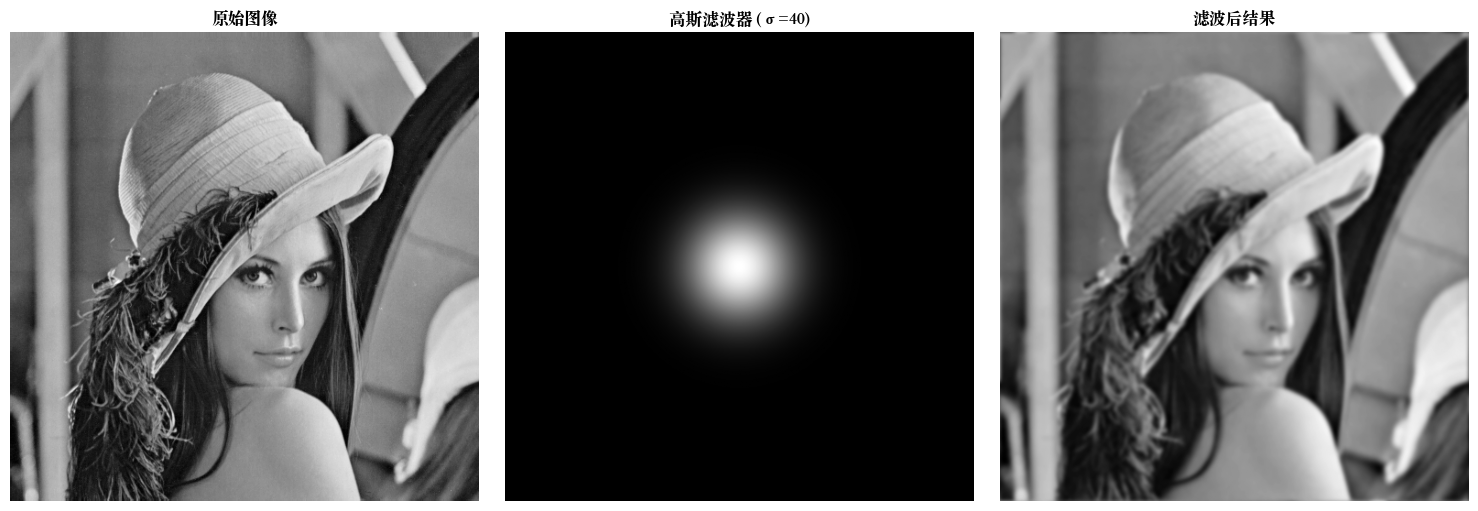

In [32]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

def gaussian_lowpass_filter(image_path, sigma=30):
    """
    高斯低通滤波函数
    :param image_path: 输入图像路径
    :param sigma: 高斯核标准差，控制模糊程度（默认30）
    :return: 滤波后的图像
    """
    # 读取图像并转换为灰度图
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 转换为浮点型并进行归一化
    img_float = np.float32(img) / 255.0

    # 傅里叶变换
    f = np.fft.fft2(img_float)
    fshift = np.fft.fftshift(f)  # 将低频移动到中心

    # 创建高斯滤波器
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    d = np.sqrt(X**2 + Y**2)
    gaussian_filter = np.exp(-(d**2)/(2*sigma**2))

    # 应用滤波器
    fshift_filtered = fshift * gaussian_filter

    # 逆傅里叶变换
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_back)

    # 转换为0-255范围
    img_filtered = np.uint8(255 * img_filtered / np.max(img_filtered))

    return img, img_filtered, gaussian_filter
# 使用示例
if __name__ == "__main__":
    plt.rcParams['font.sans-serif'] = ['Songti SC']  # macOS 系统自带「宋体」
    plt.rcParams['axes.unicode_minus'] = False       # 解决负号显示为方块的问题
        # 输入参数设置
    input_image = "lena.png"  # 替换为你的图片路径
    sigma_value = 40  # 增大该值会增加模糊程度

    # 执行滤波
    original, filtered, filter_mask = gaussian_lowpass_filter(input_image, sigma_value)

    # 可视化结果
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('原始图像')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(filter_mask, cmap='gray')
    plt.title(f'高斯滤波器 (σ={sigma_value})')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(filtered, cmap='gray')
    plt.title('滤波后结果')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## （频域）高斯函数的高通滤波

import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_highpass_filter(image, sigma=30):
    """频域高斯高通滤波
    :param sigma: 截止频率控制参数
    :return: 滤波后图像
    """
    # 转换为浮点型并归一化
    img_float = np.float32(image) / 255.0

    # 傅里叶变换
    fft = np.fft.fft2(img_float)
    fshift = np.fft.fftshift(fft)

    # 生成高斯高通滤波器
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = 1 - np.exp(-(D**2)/(2*sigma**2))

    # 应用滤波器
    fshift_filtered = fshift * H

    # 逆傅里叶变换
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    filtered = np.abs(img_back)

    # 转换为0-255范围
    return np.uint8(255 * filtered / np.max(filtered)), H

# ========== 主程序 ==========
if __name__ == "__main__":
    # 读取图像并转换为灰度
    img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

    # 参数设置
    SIGMA = 10  # 增大该值会保留更多低频成分（减弱高通效果）

    # 执行滤波
    filtered_img, H = gaussian_highpass_filter(img, SIGMA)

    # 可视化
    plt.figure(figsize=(15,5))

    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(H, cmap='jet')
    plt.title(f'Gaussian Highpass Filter\nσ={SIGMA}')
    plt.colorbar()

    plt.subplot(133)
    plt.imshow(filtered_img, cmap='gray')
    plt.title('Filtered Result')

    plt.tight_layout()
    plt.show()

## Sobel 边缘检测

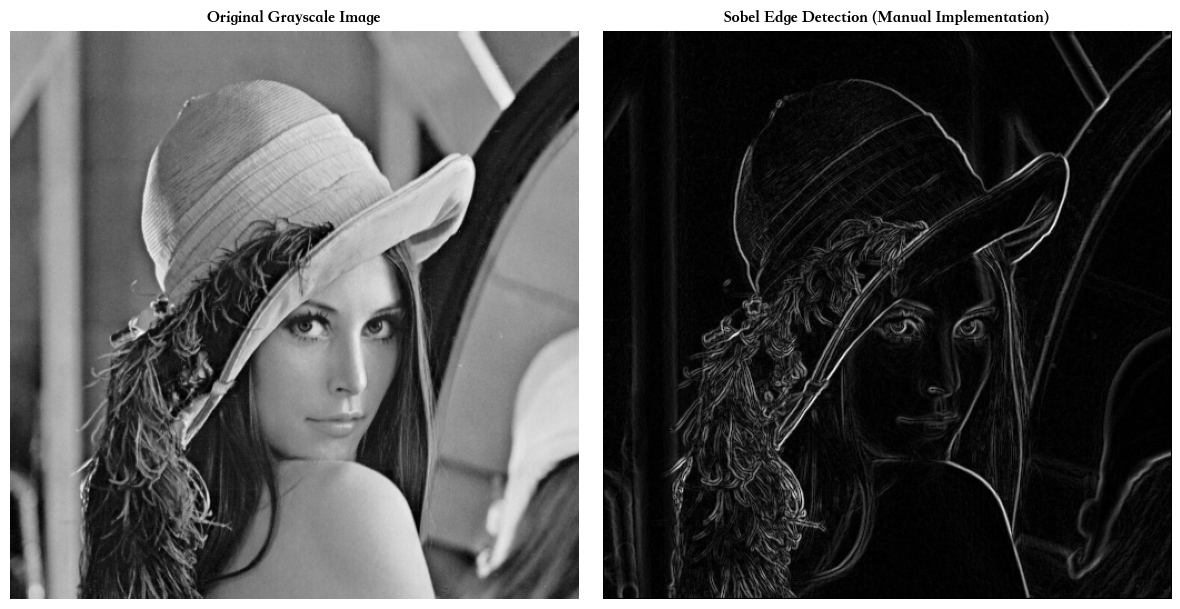

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_sobel_edge_detection(img):
    """手动实现 Sobel 边缘检测"""
    # 定义 Sobel 核
    Gx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)

    Gy = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

    # 初始化梯度矩阵
    height, width = img.shape
    grad_x = np.zeros_like(img, dtype=np.float32)
    grad_y = np.zeros_like(img, dtype=np.float32)

    # 遍历图像（忽略边缘）
    for y in range(1, height-1):
        for x in range(1, width-1):
            # 提取 3x3 邻域
            region = img[y-1:y+2, x-1:x+2]

            # 计算梯度
            grad_x[y, x] = np.sum(region * Gx)
            grad_y[y, x] = np.sum(region * Gy)

    # 计算梯度幅值（绝对值简化）
    grad = np.abs(grad_x) + np.abs(grad_y)

    # 归一化到 0-255
    grad = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return grad

# 读取图像并转为灰度
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# 执行边缘检测
edge_img = manual_sobel_edge_detection(img)
# 绘制结果
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edge_img, cmap='gray')
plt.title('Sobel Edge Detection (Manual Implementation)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Sobel 垂直边缘检测

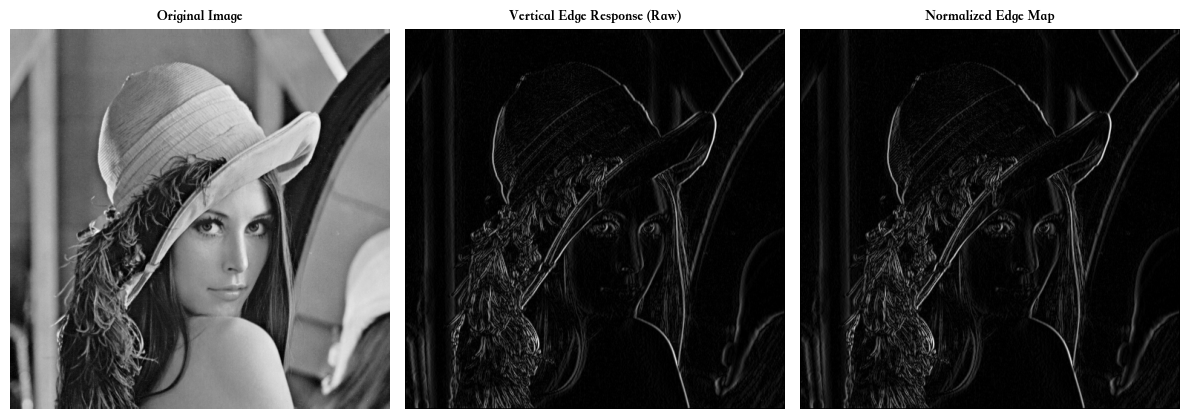

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_convolution(img, kernel):
    """手动实现卷积操作"""
    h, w = img.shape
    k_size = kernel.shape[0]
    pad = k_size // 2

    # 初始化输出矩阵
    output = np.zeros_like(img, dtype=np.float32)

    # 遍历图像（忽略边缘）
    for y in range(pad, h-pad):
        for x in range(pad, w-pad):
            # 提取当前邻域
            region = img[y-pad:y+pad+1, x-pad:x+pad+1]
            # 计算卷积结果
            output[y, x] = np.sum(region * kernel)

    return output

# 读取图像并灰度化
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# 定义Gx核
Gx = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]], dtype=np.float32)

# 执行卷积运算
grad_x = manual_convolution(img.astype(np.float32), Gx)

# 后处理
grad_abs = np.abs(grad_x)  # 取绝对值
grad_norm = cv2.normalize(grad_abs, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 可视化
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image', fontsize=10)
plt.axis('off')

plt.subplot(132)
plt.imshow(grad_abs, cmap='gray')
plt.title('Vertical Edge Response (Raw)', fontsize=10)
plt.axis('off')

plt.subplot(133)
plt.imshow(grad_norm, cmap='gray')
plt.title('Normalized Edge Map', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()

## Sobel 水平边缘检测

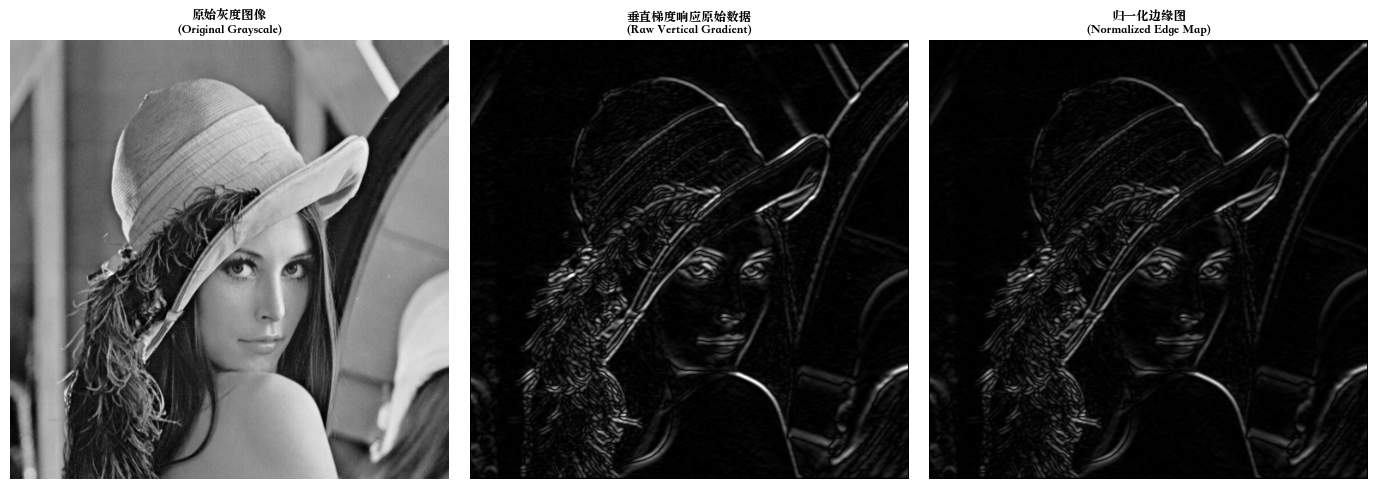

In [48]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def vertical_edge_detection(img):
    """Gy核垂直边缘检测优化实现"""
    # 定义Gy核
    Gy = np.array([[-1, -2, -1],
                  [ 0,  0,  0],
                  [ 1,  2,  1]], dtype=np.float32)

    # 预处理：高斯滤波降噪（σ=1.5）
    blurred = cv2.GaussianBlur(img, (5,5), 1.5)

    # 手动卷积优化（向量化运算）
    h, w = blurred.shape
    grad_y = np.zeros_like(blurred, dtype=np.float32)

    # 仅遍历有效区域
    for y in range(1, h-1):
        # 批量提取三行数据
        upper = blurred[y-1, :].astype(np.float32)
        middle = blurred[y, :].astype(np.float32)
        lower = blurred[y+1, :].astype(np.float32)

        # 计算当前行梯度（向量化运算）
        grad_row = (-1*upper) + (-2*upper) + (-1*upper) + \
                   (1*lower) + (2*lower) + (1*lower)

        # 中间列处理（避免越界）
        grad_y[y, 1:-1] = grad_row[0:-2] + grad_row[1:-1] + grad_row[2:]

    # 后处理
    grad_abs = np.abs(grad_y)  # 保留边缘强度
    grad_norm = cv2.normalize(grad_abs, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return grad_abs, grad_norm

plt.rcParams['font.sans-serif'] = ['Songti SC']  # macOS 系统自带「宋体」
plt.rcParams['axes.unicode_minus'] = False       # 解决负号显示为方块的问题
# 读取图像
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# 执行检测
raw_grad, final_edge = vertical_edge_detection(img)

# 可视化
plt.figure(figsize=(14, 6), dpi=100)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('原始灰度图像\n(Original Grayscale)', fontsize=9, pad=5)
plt.axis('off')
plt.subplot(132)
plt.imshow(raw_grad, cmap='gray', vmax=raw_grad.max()*0.8)  # 增强对比度
plt.title('垂直梯度响应原始数据\n(Raw Vertical Gradient)', fontsize=9, pad=5)
plt.axis('off')

plt.subplot(133)
plt.imshow(final_edge, cmap='gray')
plt.title('归一化边缘图\n(Normalized Edge Map)', fontsize=9, pad=5)
plt.axis('off')

plt.tight_layout(pad=1.5)
plt.savefig('vertical_edge_detection.png', bbox_inches='tight')
plt.show()

## 中值盒式滤波的频域展示

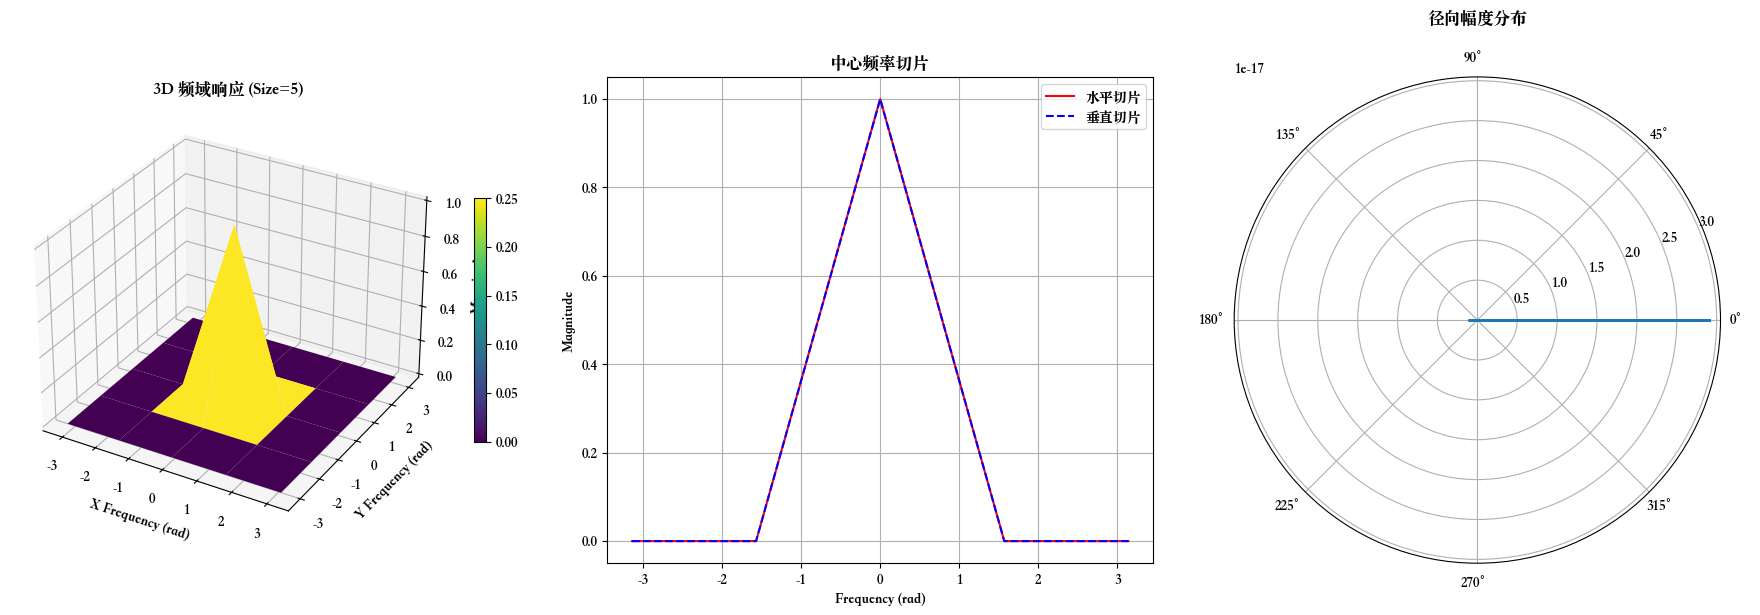

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_frequency_response(kernel_size=15):
    """可视化均值滤波器的频域响应波形
    :param kernel_size: 滤波器尺寸（奇数）
    """
    # 生成均值滤波核
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size**2)

    # 傅里叶变换
    fft = np.fft.fft2(kernel)
    fft_shift = np.fft.fftshift(fft)
    magnitude = np.abs(fft_shift)

    # 创建频率坐标网格
    freq = np.linspace(-np.pi, np.pi, kernel_size)
    X, Y = np.meshgrid(freq, freq)

    # ========== 三维波形可视化 ==========
    fig = plt.figure(figsize=(18, 6))

    # 三维曲面图
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X, Y, magnitude, cmap='viridis', rstride=1, cstride=1)
    ax1.set_title(f'3D 频域响应 (Size={kernel_size})')
    ax1.set_xlabel('X Frequency (rad)')
    ax1.set_ylabel('Y Frequency (rad)')
    ax1.set_zlabel('Magnitude')
    fig.colorbar(surf, ax=ax1, shrink=0.5)

    # ========== 二维波形切片 ==========
    ax2 = fig.add_subplot(132)
    ax2.plot(freq, magnitude[kernel_size//2, :], 'r-', label='水平切片')
    ax2.plot(freq, magnitude[:, kernel_size//2], 'b--', label='垂直切片')
    ax2.set_title('中心频率切片')
    ax2.set_xlabel('Frequency (rad)')
    ax2.set_ylabel('Magnitude')
    ax2.legend()
    ax2.grid(True)
   # ========== 极坐标波形修复版 ==========
    ax3 = fig.add_subplot(133, projection='polar')

    # 生成半径序列（0到π）
    radii = np.linspace(0, np.pi, kernel_size//2 + 1)

    # 计算径向平均幅度
    radial_profile = []
    for r in radii[1:]:  # 跳过0点
        mask = (np.hypot(X, Y) <= r) & (np.hypot(X, Y) > r - np.pi/(kernel_size//2))
        radial_profile.append(np.mean(magnitude[mask]))

    # 生成角度序列（与数据点数量匹配）
    theta = np.linspace(0, 2*np.pi, len(radial_profile)+1)[:-1]  # 移除最后一个重复点

    # 闭合曲线
    theta = np.append(theta, theta[0])
    radial_profile = np.append(radial_profile, radial_profile[0])

    ax3.plot(theta, radial_profile, lw=2)
    ax3.set_title('径向幅度分布', pad=20)
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

# 执行可视化（可测试不同尺寸）
if __name__ == "__main__":
    plt.rcParams['font.sans-serif'] = ['Songti SC']  # macOS 系统自带「宋体」
    plt.rcParams['axes.unicode_minus'] = False       # 解决负号显示为方块的问题
    visualize_frequency_response(kernel_size=5)  # 有效尺寸：5,7,9,...25